## Script for analyzing log data of the Scenario Generator 

In [184]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [185]:
Scenarioname = 'LaneChangeSimple'
Scenarioroot = './logs/' + Scenarioname + '.xosc/'

In [186]:
all_files = glob.glob(os.path.join(Scenarioroot, "*.csv"))
len(all_files)
df_from_each_file = (pd.read_csv(f) for f in all_files)
dataframe = pd.concat(df_from_each_file, axis=1, ignore_index=False)
dataframe = dataframe.loc[0:499, :]
dataframe['name'] = dataframe['name'].str.lstrip('vehicle.')

dataframe_nums = dataframe.iloc[:, [0, 2, 3, 4, 7]]
dataframe_str = dataframe.iloc[:, [1, 5, 6]]
df_norm = (dataframe_nums - dataframe_nums.mean()) / (dataframe_nums.max() - dataframe_nums.min())
#dataframe

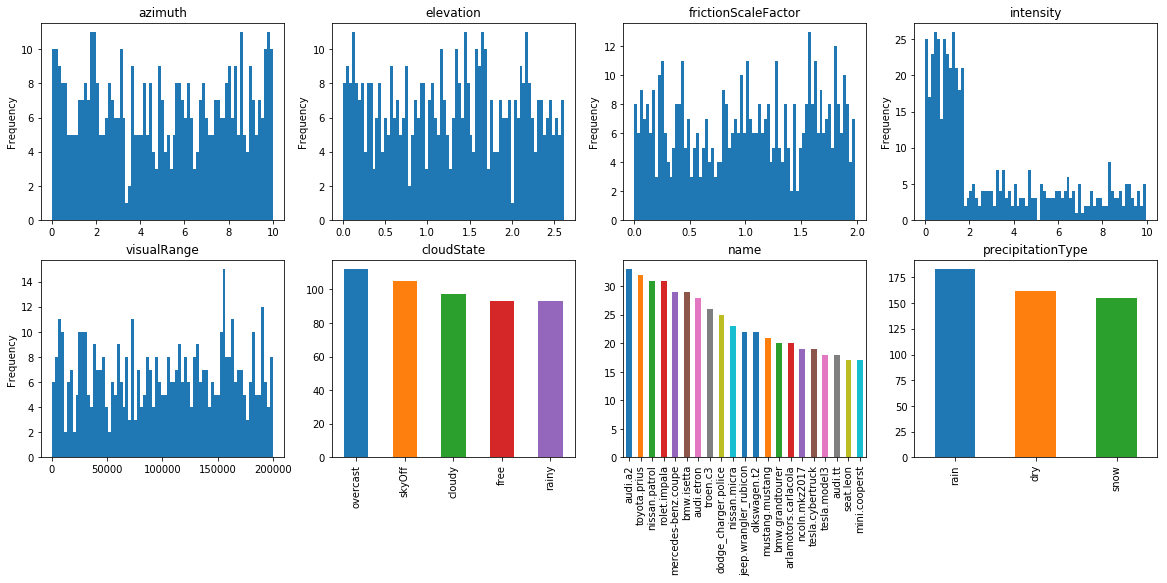

In [187]:
fig = plt.figure(figsize=(20,8))

for i in range(5):

    ax = fig.add_subplot(2, 4, i+1)
    ax = dataframe_nums.iloc[:, i].plot.hist(bins=75)
    ax.set_title(dataframe_nums.columns[i])
    

for i in range(3):
    ax = fig.add_subplot(2, 4, i+6)
    ax = dataframe_str.iloc[:, i].value_counts().plot(kind="bar")
    ax.set_title(dataframe_str.columns[i])
    
fig.savefig('./report/figures/' + Scenarioname + "Histograms500Scenarios.png", dpi=200)

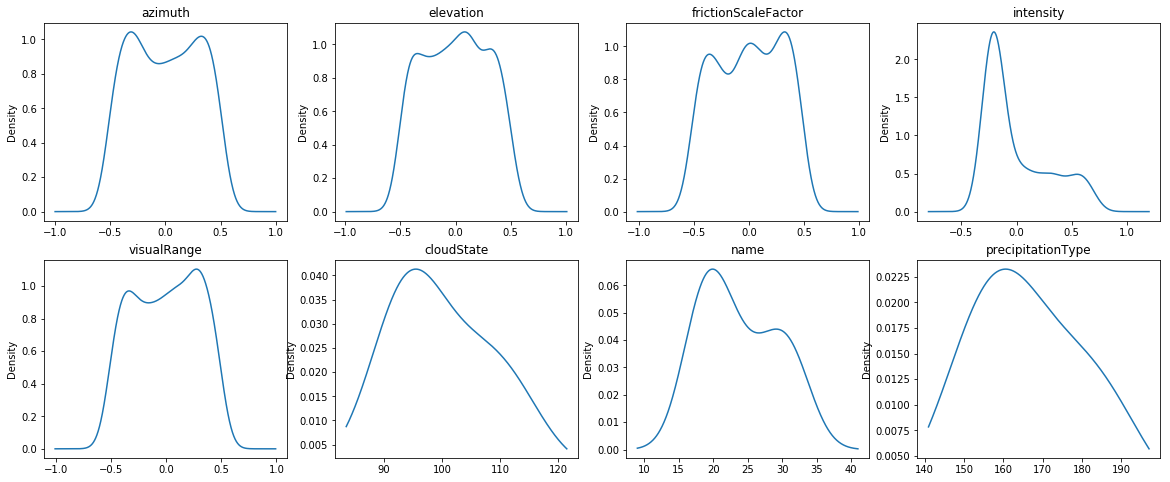

In [188]:
fig = plt.figure(figsize=(20,8))


for i in range(5):
    #print(dataframe_nums.iloc[:, i])
    ax = fig.add_subplot(2, 4, i+1)
    ax = df_norm.iloc[:, i].plot.kde()
    ax.set_title(dataframe_nums.columns[i])

for i in range(3):
    ax = fig.add_subplot(2, 4, i+6)
    ax = dataframe_str.iloc[:, i].value_counts().plot.kde()
    ax.set_title(dataframe_str.columns[i])
fig.savefig('./report/figures/' + Scenarioname + "Densities500Scenarios.png", dpi=200)